In [105]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf

In [106]:
import warnings

warnings.simplefilter("ignore")

## IBOV

In [20]:
ibov = yf.Ticker('^BVSP')

historic_ibov = ibov.history(start='2003-09-16', end='2023-09-16')['Close']
historic_ibov.index = pd.to_datetime(historic_ibov.index).date

historic_ibov

2003-09-16     16270.0
2003-09-17     16492.0
2003-09-18     16889.0
2003-09-19     16851.0
2003-09-22     16486.0
                ...   
2023-09-11    116883.0
2023-09-12    117968.0
2023-09-13    118176.0
2023-09-14    119392.0
2023-09-15    118758.0
Name: Close, Length: 4952, dtype: float64

In [21]:
# criando a cota n1

historic_ibov.divide(historic_ibov.iloc[0] / 1)

2003-09-16    1.000000
2003-09-17    1.013645
2003-09-18    1.038045
2003-09-19    1.035710
2003-09-22    1.013276
                ...   
2023-09-11    7.183958
2023-09-12    7.250645
2023-09-13    7.263430
2023-09-14    7.338168
2023-09-15    7.299201
Name: Close, Length: 4952, dtype: float64

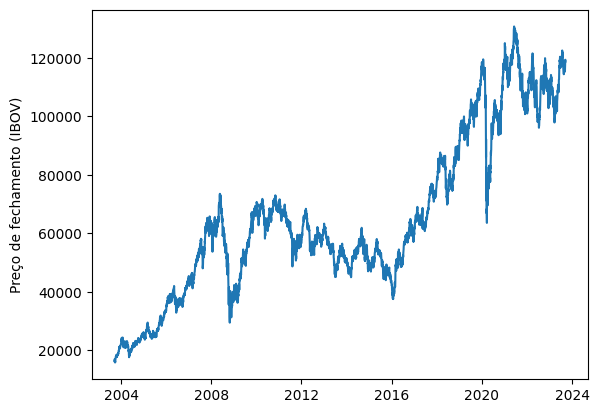

In [28]:
sns.lineplot(historic_ibov)
plt.ylabel('Preço de fechamento (IBOV)')
plt.show()

In [31]:
# variação diária do índice

ibov_var = historic_ibov.pct_change()
ibov_var = ibov_var.iloc[1:len(ibov_var.index)]

ibov_var

2003-09-17    0.013645
2003-09-18    0.024072
2003-09-19   -0.002250
2003-09-22   -0.021660
2003-09-23   -0.002548
                ...   
2023-09-11    0.013615
2023-09-12    0.009283
2023-09-13    0.001763
2023-09-14    0.010290
2023-09-15   -0.005310
Name: Close, Length: 4951, dtype: float64

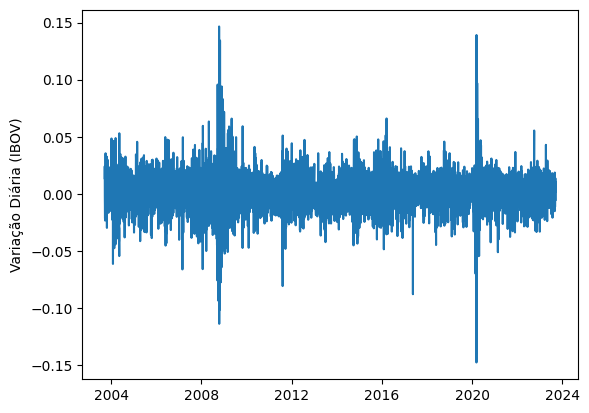

In [110]:
sns.lineplot(ibov_var)
plt.ylabel('Variação Diária (IBOV)')
plt.show()

In [38]:
# retorno médio anualizado

avg_return = np.mean(ibov_var, axis=0) * 252 

print(f"Retorno anualizado do IBOV foi de {round(avg_return * 100, 2)}%")

Retorno anualizado do IBOV foi de 13.82%


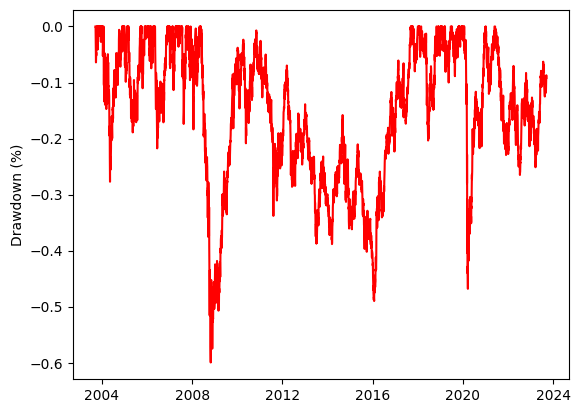

In [96]:
# drawdown

cum_returns = (1 + ibov_var).cumprod()
cum_max = cum_returns.cummax()

drawdown = (cum_returns - cum_max) / cum_max

sns.lineplot(drawdown, color='red')
plt.ylabel('Drawdown (%)')
plt.show()

In [46]:
print(f"O drawdown máximo foi de {round(min(drawdown) * 100, 2)}%")

O drawdown máximo foi de -59.96%


In [90]:
is_drawdown = drawdown < 0

drawdown_changes = is_drawdown.ne(is_drawdown.shift()).cumsum()

durations = is_drawdown[is_drawdown].groupby(drawdown_changes).size()

print(f"Período médio de drawdown: {int(durations.mean())} dias")
print(f"Período máximo de drawdown: {durations.max()} dias")

Período médio de drawdown: 38 dias
Período máximo de drawdown: 2304 dias


## IMA-B

In [102]:
imab = pd.read_excel('data/imab-historico.xls', engine='openpyxl')

historic_imab = imab.loc[imab['Data de Referência'] < '2023-09-16', ['Data de Referência', 'Número Índice']]
historic_imab = historic_imab.set_index('Data de Referência').squeeze()

historic_imab

/home/ian/triathlon-studies/env/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Data de Referência
2003-09-16     723.070317
2003-09-17     723.162887
2003-09-18     724.280592
2003-09-19     726.499199
2003-09-22     728.083768
                 ...     
2023-09-11    9537.953404
2023-09-12    9554.262508
2023-09-13    9559.859678
2023-09-14    9563.945854
2023-09-15    9542.577677
Name: Número Índice, Length: 5023, dtype: float64

In [112]:
# criando a cota n1

historic_imab.divide(historic_imab.iloc[0] / 1)

Data de Referência
2003-09-16     1.000000
2003-09-17     1.000128
2003-09-18     1.001674
2003-09-19     1.004742
2003-09-22     1.006934
                ...    
2023-09-11    13.190907
2023-09-12    13.213462
2023-09-13    13.221203
2023-09-14    13.226854
2023-09-15    13.197302
Name: Número Índice, Length: 5023, dtype: float64

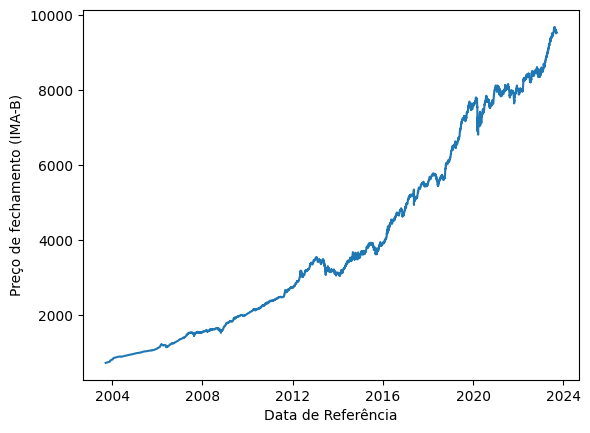

In [107]:
sns.lineplot(historic_imab)
plt.ylabel('Preço de fechamento (IMA-B)')
plt.show()

In [113]:
# variação diária do índice

imab_var = historic_imab.pct_change()
imab_var = imab_var.iloc[1:len(imab_var.index)]

imab_var

Data de Referência
2003-09-17    0.000128
2003-09-18    0.001546
2003-09-19    0.003063
2003-09-22    0.002181
2003-09-23    0.001795
                ...   
2023-09-11    0.000633
2023-09-12    0.001710
2023-09-13    0.000586
2023-09-14    0.000427
2023-09-15   -0.002234
Name: Número Índice, Length: 5022, dtype: float64

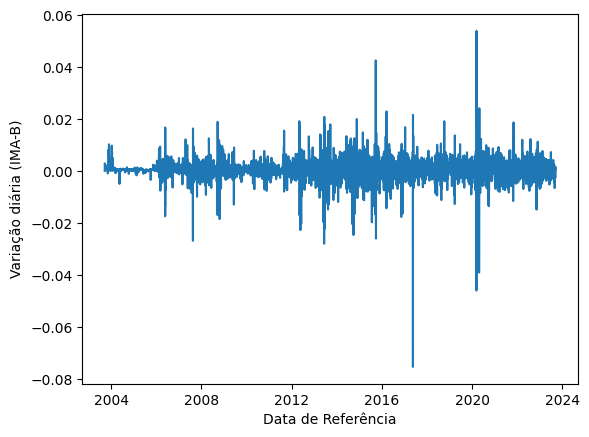

In [114]:
sns.lineplot(imab_var)
plt.ylabel('Variação diária (IMA-B)')
plt.show()

In [115]:
avg_return = np.mean(imab_var, axis=0) * 252 

print(f"Retorno anualizado do IMA-B foi de {round(avg_return * 100, 2)}%")

Retorno anualizado do IMA-B foi de 13.16%


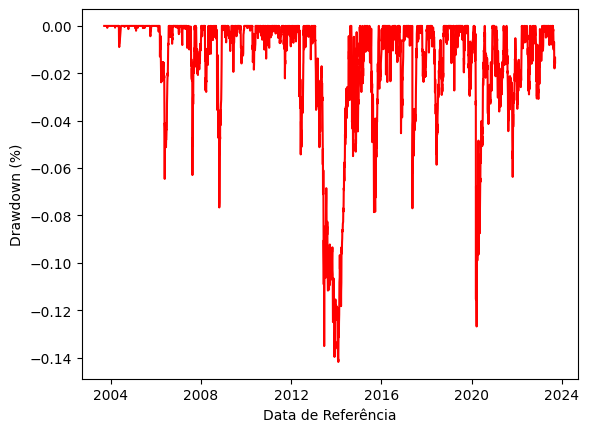

In [116]:
# drawdown

cum_returns = (1 + imab_var).cumprod()
cum_max = cum_returns.cummax()

drawdown = (cum_returns - cum_max) / cum_max

sns.lineplot(drawdown, color='red')
plt.ylabel('Drawdown (%)')
plt.show()

In [117]:
print(f"O drawdown máximo foi de {round(min(drawdown) * 100, 2)}%")

O drawdown máximo foi de -14.18%


In [118]:
is_drawdown = drawdown < 0

drawdown_changes = is_drawdown.ne(is_drawdown.shift()).cumsum()

durations = is_drawdown[is_drawdown].groupby(drawdown_changes).size()

print(f"Período médio de drawdown: {int(durations.mean())} dias")
print(f"Período máximo de drawdown: {durations.max()} dias")

Período médio de drawdown: 10 dias
Período máximo de drawdown: 393 dias


## CDI

In [126]:
data_inicio = '16/09/2003'
data_fim =  '15/09/2023'

api = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial={data_inicio}&dataFinal={data_fim}'

In [132]:
cdi = pd.read_json(api)

cdi

,data,valor
0,16/09/2003,0.078419
1,17/09/2003,0.078386
2,18/09/2003,0.071879
3,19/09/2003,0.071879
4,22/09/2003,0.071879
...,...,...
5020,11/09/2023,0.049037
5021,12/09/2023,0.049037
5022,13/09/2023,0.049037
5023,14/09/2023,0.049037


In [133]:
cdi = cdi.set_index('data')

cdi.index = pd.to_datetime(cdi.index, dayfirst=True)
cdi.columns = ['cdi']

historic_cdi = cdi.squeeze()

historic_cdi

data
2003-09-16    0.078419
2003-09-17    0.078386
2003-09-18    0.071879
2003-09-19    0.071879
2003-09-22    0.071879
                ...   
2023-09-11    0.049037
2023-09-12    0.049037
2023-09-13    0.049037
2023-09-14    0.049037
2023-09-15    0.049037
Name: cdi, Length: 5025, dtype: float64

In [136]:
cdi_returns = (1 + historic_cdi / 100).cumprod()

cdi_returns

data
2003-09-16    1.000784
2003-09-17    1.001569
2003-09-18    1.002289
2003-09-19    1.003009
2003-09-22    1.003730
                ...   
2023-09-11    7.801509
2023-09-12    7.805335
2023-09-13    7.809163
2023-09-14    7.812992
2023-09-15    7.816823
Name: cdi, Length: 5025, dtype: float64

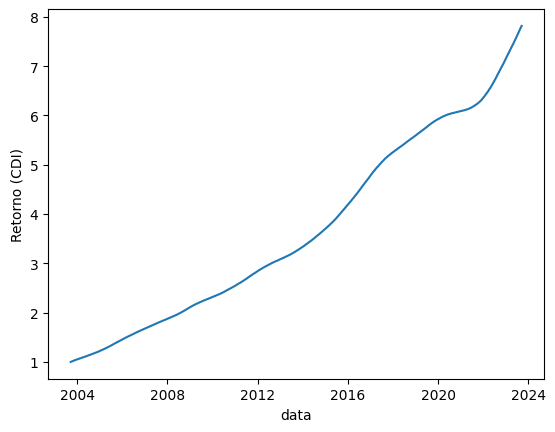

In [138]:
sns.lineplot(cdi_returns)
plt.ylabel('Retorno (CDI)')
plt.show()

In [142]:
# variação diária do índice

cdi_var = cdi_returns.pct_change()
cdi_var = cdi_var.iloc[1:len(cdi_var.index)]

cdi_var

data
2003-09-17    0.000784
2003-09-18    0.000719
2003-09-19    0.000719
2003-09-22    0.000719
2003-09-23    0.000719
                ...   
2023-09-11    0.000490
2023-09-12    0.000490
2023-09-13    0.000490
2023-09-14    0.000490
2023-09-15    0.000490
Name: cdi, Length: 5024, dtype: float64

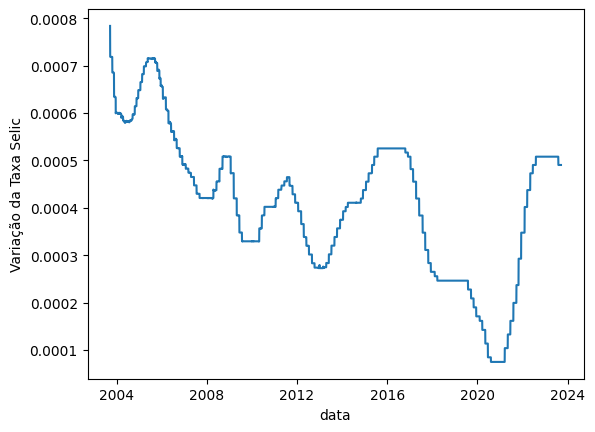

In [144]:
sns.lineplot(cdi_var)
plt.ylabel('Variação da Taxa Selic')
plt.show()

In [146]:
avg_return = np.mean(cdi_var, axis=0) * 252 

print(f"Retorno anualizado do CDI foi de {round(avg_return * 100, 2)}%")

Retorno anualizado do CDI foi de 10.31%


## Porfolio

In [171]:
data = {
    'Asset1': [100, 101, 102],
    'Asset2': [200, 202, 204],
    'Asset3': [300, 303, 306]
}

df = pd.DataFrame(data)

returns = df.pct_change()

In [172]:
series = (returns * [.5, .25, .25]).sum(axis=1)

series

0    0.000000
1    0.010000
2    0.009901
dtype: float64